In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [73]:
test_path = r'./Test_Images/Form'
image_template = 'template.png'
image_test = 'test_perspective.png'

image_template = os.path.join(test_path, image_template)
image_test = os.path.join(test_path, image_test)

In [74]:
img1 = cv2.imread(image_template,cv2.COLOR_BGR2GRAY)          # Template Image
img2 = cv2.imread(image_test,cv2.COLOR_BGR2GRAY)              # Test Image

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

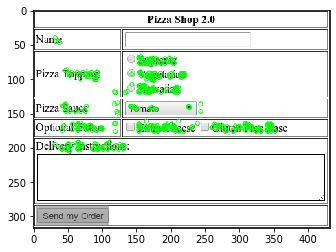

(<matplotlib.image.AxesImage at 0x7fd45dd2ea58>, None)

In [75]:
# draw only keypoints location,not size and orientation
img = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img), plt.show()

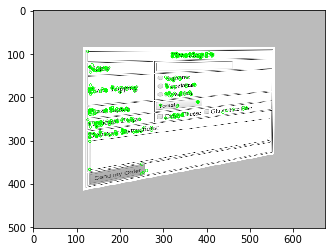

(<matplotlib.image.AxesImage at 0x7fd45dc9f0f0>, None)

In [76]:
# draw only keypoints location,not size and orientation
img = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
plt.imshow(img), plt.show()

In [77]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

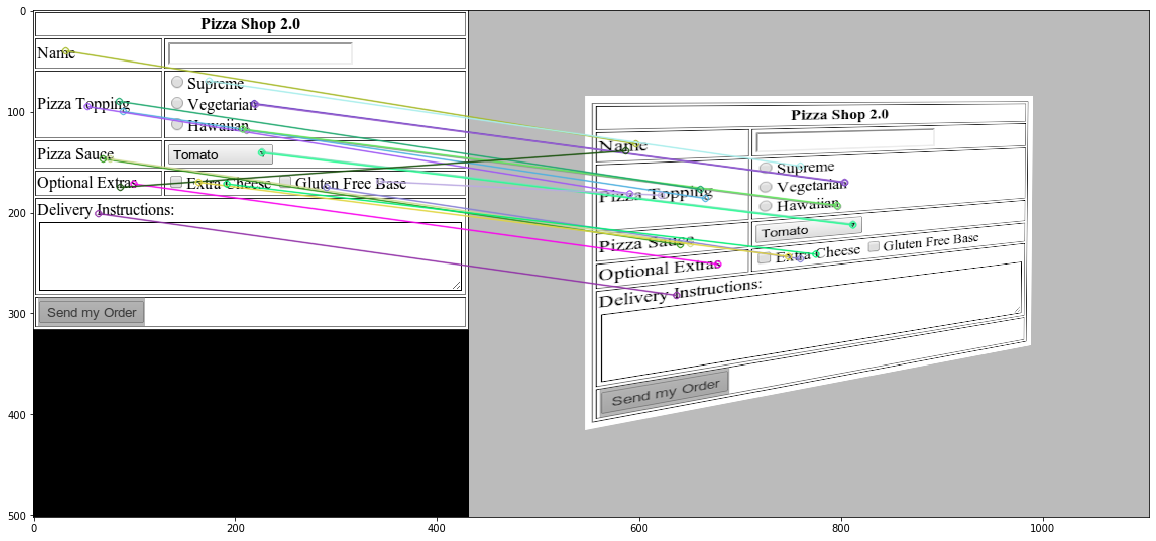

(<matplotlib.image.AxesImage at 0x7fd45dc7a9b0>, None)

In [78]:
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:20], None, flags=2)

plt.figure(figsize = (20,20))
plt.imshow(img3),plt.show()

In [79]:
# Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt
  
  # Find homography
  homography_matrix, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

In [80]:
homography_matrix

array([[ 7.35872965e-01,  3.43330947e-03, -9.29407735e+01],
       [ 1.15600281e-02,  9.66519212e-01, -9.27425341e+01],
       [-4.75584720e-04,  3.96991042e-05,  1.00000000e+00]])

In [81]:
# use the homography matrix to align the images
(height, width) = img1.shape
aligned = cv2.warpPerspective(img2, homography_matrix, (width, height))

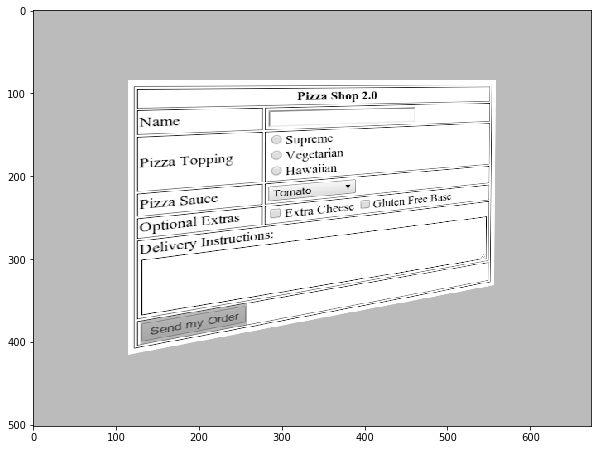

(<matplotlib.image.AxesImage at 0x7fd45dbda908>, None)

In [82]:
plt.figure(figsize = (10,10))
plt.imshow(img2, cmap='gray'), plt.show()

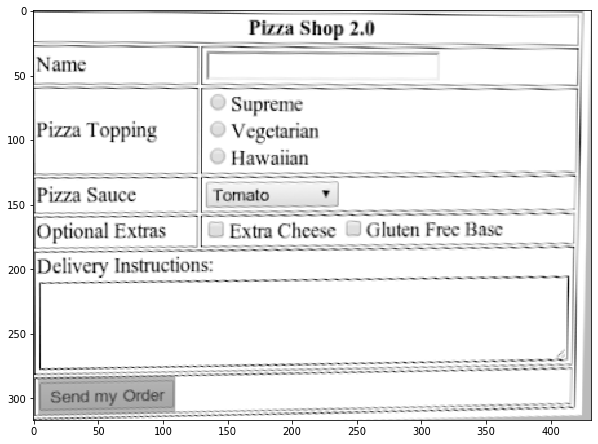

(<matplotlib.image.AxesImage at 0x7fd45dbb8f28>, None)

In [83]:
plt.figure(figsize = (10,10))
plt.imshow(aligned, cmap='gray'), plt.show()